<a href="https://colab.research.google.com/github/Ifra96/BDP-cont./blob/main/BDP_Pak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

     |████████████████████████████████| 11.5 MB 3.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Pak-adress-.txt to Pak-adress-.txt


In [ ]:
f = open("Pak-adress-.txt", "r") #read
print(f.read())

Mr. President,
Secretary General Guterres, 
Excellencies, 
Ladies and Gentlemen,
I am honoured to address the United Nations General Assembly once again.
I congratulate His Excellency Mr. Volkan Bozkir on his election as the President of the seventy-fifth session of the General Assembly. 
We also appreciate the skilful leadership of the outgoing President, His Excellency Tijani Muhammad-Bande, especially during the COVID-19 crisis.
We commend the leadership of the Secretary General in these extremely turbulent times. 
Mr. President,
Since my government assumed office, our consistent effort has been to fundamentally transform Pakistan. 
We envisage 'Naya Pakistan' to be modeled on the principles of the State of Madinah, established by our Holy Prophet Muhammad (PBUH). 
A just and humane society where all Government policies are directed at lifting our citizens out of poverty and creating a just and equitable dispensation. 
To achieve this goal, we need to have peace and stability. Thus 

In [ ]:
import pandas as pd
df = pd.read_csv("Pak-adress-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,"Mr. President,"
1,"Secretary General Guterres,"
2,"Excellencies,"
3,"Ladies and Gentlemen,"
4,I am honoured to address the United Nations Ge...
...,...
103,I urge the Secretary-General to take the lead ...
104,He should convene Summit-level meetings to add...
105,The United Nations should be made fully respon...
106,Pakistan will continue to participate actively...


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean
0,mr president,"[mr, president]","[mr, president]"
1,secretary general guterres,"[secretary, general, guterres]","[secretary, general, guterres]"
2,excellencies,[excellencies],[excellencies]
3,ladies and gentlemen,"[ladies, and, gentlemen]","[ladies, gentlemen]"
4,i am honoured to address the united_nations ge...,"[i, am, honoured, to, address, the, united_nat...","[honoured, address, united_nations, general, a..."
...,...,...,...
103,i urge the secretary general to take the lead ...,"[i, urge, the, secretary, general, to, take, t...","[urge, secretary, general, take, lead, prevent..."
104,he should convene summit level meetings to add...,"[he, should, convene, summit, level, meetings,...","[convene, summit, level, meetings, address, re..."
105,the united_nations should be made fully respon...,"[the, united_nations, should, be, made, fully,...","[united_nations, made, fully, responsive, chal..."
106,pakistan will continue to participate actively...,"[pakistan, will, continue, to, participate, ac...","[pakistan, continue, participate, actively, pr..."


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df

,text,token,clean,stems
0,mr president,"[mr, president]","[mr, president]","[mr, president]"
1,secretary general guterres,"[secretary, general, guterres]","[secretary, general, guterres]","[secretary, general, guterres]"
2,excellencies,[excellencies],[excellencies],[excellency]
3,ladies and gentlemen,"[ladies, and, gentlemen]","[ladies, gentlemen]","[lady, gentleman]"
4,i am honoured to address the united_nations ge...,"[i, am, honoured, to, address, the, united_nat...","[honoured, address, united_nations, general, a...","[honour, address, united_nations, general, ass..."
...,...,...,...,...
103,i urge the secretary general to take the lead ...,"[i, urge, the, secretary, general, to, take, t...","[urge, secretary, general, take, lead, prevent...","[urge, secretary, general, take, lead, prevent..."
104,he should convene summit level meetings to add...,"[he, should, convene, summit, level, meetings,...","[convene, summit, level, meetings, address, re...","[convene, summit, level, meeting, address, reg..."
105,the united_nations should be made fully respon...,"[the, united_nations, should, be, made, fully,...","[united_nations, made, fully, responsive, chal...","[united_nations, make, fully, responsive, chal..."
106,pakistan will continue to participate actively...,"[pakistan, will, continue, to, participate, ac...","[pakistan, continue, participate, actively, pr...","[pakistan, continue, participate, actively, pr..."


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


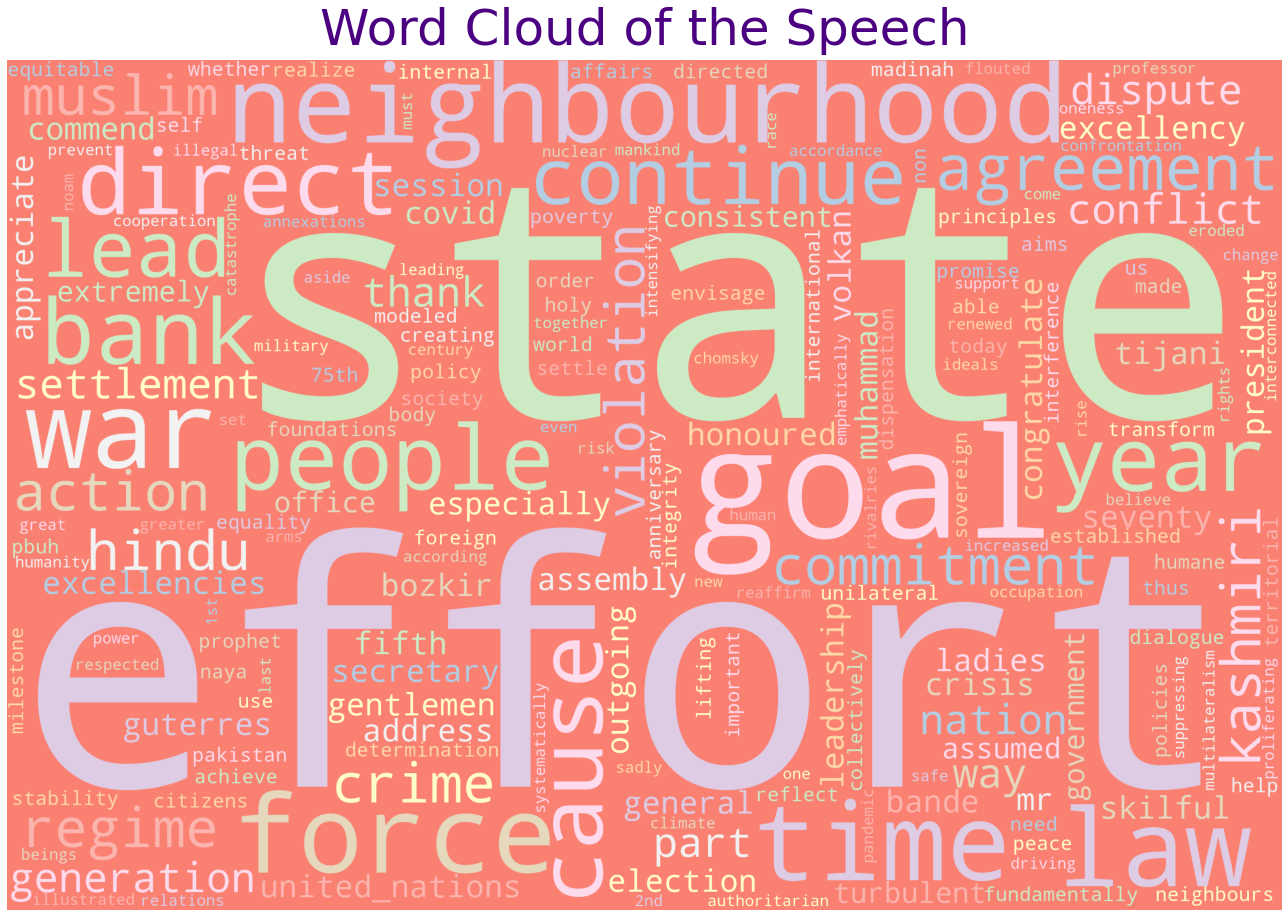

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.028*"must" + 0.020*"kashmir" + 0.013*"jammu" + 0.012*"council" + 0.011*"india" + 0.010*"security" + 0.009*"pakistan" + 0.009*"change" + 0.008*"war" + 0.008*"occupied"'), (1, '0.028*"president" + 0.027*"mr" + 0.017*"solution" + 0.017*"security" + 0.014*"afghanistan" + 0.013*"global" + 0.011*"general" + 0.011*"un" + 0.010*"conflicts" + 0.010*"resolutions"'), (2, '0.031*"pakistan" + 0.010*"afghan" + 0.010*"muslims" + 0.009*"comprehensive" + 0.009*"fully" + 0.009*"promote" + 0.008*"process" + 0.008*"political" + 0.008*"continue" + 0.008*"line"'), (3, '0.028*"peace" + 0.016*"united_nations" + 0.014*"indian" + 0.012*"human" + 0.012*"state" + 0.011*"world" + 0.011*"india" + 0.010*"palestinian" + 0.009*"rights" + 0.009*"international"')]


In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.010*"political" + 0.010*"afghanistan" + 0.010*"solution" + 0.010*"peace" + 0.010*"towards" + 0.010*"nazis" + 0.010*"rss" + 0.005*"pakistan" + 0.005*"secretary" + 0.005*"laws"')
(1, '0.013*"countries" + 0.013*"developing" + 0.013*"crisis" + 0.013*"relief" + 0.013*"debt" + 0.013*"global" + 0.013*"space" + 0.013*"fiscal" + 0.007*"financial" + 0.007*"rich"')
(2, '0.014*"india" + 0.012*"muslims" + 0.011*"rss" + 0.009*"world" + 0.009*"human" + 0.009*"unprecedented" + 0.008*"pakistan" + 0.006*"indian" + 0.006*"force" + 0.006*"international"')
(3, '0.012*"international" + 0.012*"united_nations" + 0.012*"peace" + 0.012*"council" + 0.012*"kashmir" + 0.012*"made" + 0.012*"fully" + 0.012*"agreement" + 0.006*"billion" + 0.006*"climate"')
(4, '0.031*"must" + 0.014*"afghan" + 0.014*"indian" + 0.014*"kashmir" + 0.011*"people" + 0.011*"council" + 0.011*"india" + 0.011*"jammu" + 0.007*"generation" + 0.007*"occupation"')
(5, '0.019*"countries" + 0.011*"debt" + 0.011*"flows" + 0.011*"rich" + 0.011*

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7500,"president, mr, solution, security, afghanistan...","[mr, president]"
1,1,1.0,0.8119,"president, mr, solution, security, afghanistan...","[secretary, general, guterres]"
2,2,1.0,0.6210,"president, mr, solution, security, afghanistan...",[excellencies]
3,3,0.0,0.7478,"must, kashmir, jammu, council, india, security...","[ladies, gentlemen]"
4,4,3.0,0.5026,"peace, united_nations, indian, human, state, w...","[honoured, address, united_nations, general, a..."
5,5,1.0,0.9419,"president, mr, solution, security, afghanistan...","[congratulate, excellency, mr, volkan, bozkir,..."
6,6,2.0,0.8139,"pakistan, afghan, muslims, comprehensive, full...","[also, appreciate, skilful, leadership, outgoi..."
7,7,1.0,0.6367,"president, mr, solution, security, afghanistan...","[commend, leadership, secretary, general, extr..."
8,8,1.0,0.7500,"president, mr, solution, security, afghanistan...","[mr, president]"
9,9,2.0,0.9204,"pakistan, afghan, muslims, comprehensive, full...","[since, government, assumed, office, consisten..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9832,"must, kashmir, jammu, council, india, security, pakistan, change, war, occupied","[5th, august, last, year, india, illegally, unilaterally, sought, change, status, occupied, terr..."
1,1.0,0.9719,"president, mr, solution, security, afghanistan, global, general, un, conflicts, resolutions","[robust, anti, money, laundering, anti, terrorist, financing, regimes, call, upon, assembly, tak..."
2,2.0,0.9711,"pakistan, afghan, muslims, comprehensive, fully, promote, process, political, continue, line","[1992, rss, destroyed, babri, mosque, 2002, 2000, muslims, slaughtered, gujarat, watch, chief, m..."
3,3.0,0.9751,"peace, united_nations, indian, human, state, world, india, palestinian, rights, international","[palestine, remains, festering, wound, lasting, settlement, indispensable, middle, east, actuall..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 147 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=2bd14bdd9060248593607c36f9966c4191fc05cd5c1d2b8c178e6eb26e2da85d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompati

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packag

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.41532705553773897


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,mr president,"[mr, president]","[mr, president]","[mr, president]",0.00,0.0
1,secretary general guterres,"[secretary, general, guterres]","[secretary, general, guterres]","[secretary, general, guterres]",0.05,0.5
2,excellencies,[excellencies],[excellencies],[excellency],0.00,0.0
3,ladies and gentlemen,"[ladies, and, gentlemen]","[ladies, gentlemen]","[lady, gentleman]",0.00,0.0
4,i am honoured to address the united_nations general assembly once again,"[i, am, honoured, to, address, the, united_nations, general, assembly, once, again]","[honoured, address, united_nations, general, assembly]","[honour, address, united_nations, general, assembly]",0.05,0.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa662a6ac90>]],
      dtype=object)

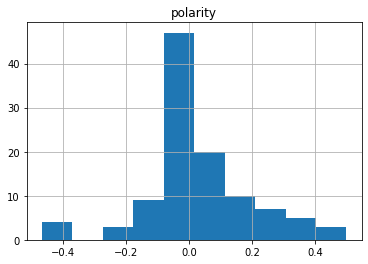

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.03718479567129257

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa662a3f2d0>]],
      dtype=object)

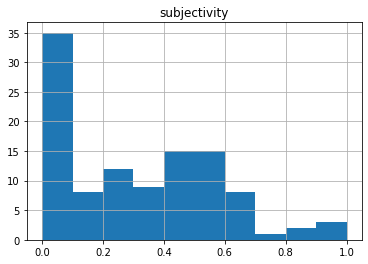

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.2974820168543162

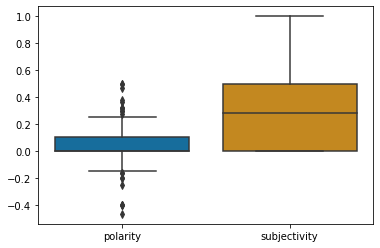

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")